In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("laptop-dataset.csv")

In [8]:
df.head(10)

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,"₹38,990",Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...
7,RedmiBook Pro Core i5 11th Gen - (8 GB/512 GB ...,4.1,"₹39,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,"₹46,990",Stylish & Portable Thin and Light Laptop14 inc...
9,ASUS VivoBook 14 (2022) Ryzen 7 Quad Core AMD ...,4.1,"₹44,990",AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM6...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [10]:
df.shape

(720, 4)

In [11]:
df.describe()

,Rating
count,581.000000
mean,4.321170
std,0.282872
min,3.000000
25%,4.200000
50%,4.300000
75%,4.500000
max,5.000000


In [12]:
df['Product']

0      Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...
1      Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...
2      ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...
3      HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...
4      ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...
                             ...                        
715    ASUS Chromebook Flip Touch Celeron Dual Core -...
716    Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...
717    ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...
718    ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...
719    Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...
Name: Product, Length: 720, dtype: object

In [13]:
df['Product'][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

In [14]:
df['Rating']

0      4.2
1      4.2
2      4.3
3      4.4
4      4.4
      ... 
715    4.0
716    4.5
717    NaN
718    3.0
719    4.2
Name: Rating, Length: 720, dtype: float64

There are some Null Values in rating feature.

In [15]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

Replacing Null Values

In [16]:
df['Rating'].value_counts()

4.2    165
4.3     72
4.4     58
4.1     56
4.6     52
4.5     48
4.0     27
4.9     26
4.7     16
3.9     15
4.8     13
5.0     12
3.7     11
3.8      4
3.5      2
3.6      2
3.4      1
3.0      1
Name: Rating, dtype: int64

In [17]:
df=df.fillna(df['Rating'].median())

In [18]:
df.isnull().sum()

Product    0
Rating     0
MRP        0
Feature    0
dtype: int64

In [19]:
df['Feature']

0      Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1      Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2      Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3      AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4      Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
                             ...                        
715    Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716    AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717    AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718    Intel Core i7 Processor (12th Gen)16 GB LPDDR5...
719    Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...
Name: Feature, Length: 720, dtype: object

In [20]:
df['Feature'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

In [21]:
import re

In [22]:
pattern=r'(?:Intel|AMD|Apple)[\s\w]+Processor'
df['Processor']=df['Feature'].apply(lambda x:re.findall(pattern, x))

In [23]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor]


In [24]:
pattern=r'\d+(\.\d+)?\s*cm'
df['Display']=df['Feature'].apply(lambda x:re.search(pattern, x).group())

In [25]:
ram_pattern=r'\d+\sGB[\s\w]+RAM'
df['RAM']=df['Feature'].apply(lambda x:re.findall(ram_pattern, x))

In [26]:
os_pattern=r'(?:Mac OS|Windows 11|Windows 10|DOS|Chrome) Operating System'
df['OS']=df['Feature'].apply(lambda x:re.findall(os_pattern, x))

In [27]:
storage_type=r'[\d]+\s(?:TB|GB)\s(?:SSD|HDD)'
df['Storage']=df['Feature'].apply(lambda x:re.findall(storage_type, x))

In [28]:
brand_name=r'^\w+'
df['Brand'] =df['Product'].apply(lambda x:re.findall(brand_name, x))

In [29]:
df.head()

,Product,Rating,MRP,Feature,Processor,Display,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],35.56 cm,[8 GB DDR4 RAM],[Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],39.62 cm,[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],39.62 cm,[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],39.62 cm,[8 GB DDR4 RAM],[Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],39.62 cm,[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS]


In [30]:
df['Processor'] = df['Processor'].apply(lambda x : ''.join(x))
df['RAM'] = df['RAM'].apply(lambda x : ''.join(x))
df['OS'] = df['OS'].apply(lambda x : ''.join(x))
df['Storage'] = df['Storage'].apply(lambda x : ''.join(x))
df['Display']=df['Display'].apply(lambda x: ''.join(x))
df['Brand'] = df['Brand'] .apply(lambda x : ''.join(x))
df['Product']=df['Product'].apply(lambda x: ''.join(x))

In [31]:
df.head()

,Product,Rating,MRP,Feature,Processor,Display,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,35.56 cm,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62 cm,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62 cm,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,39.62 cm,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,39.62 cm,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS


In [32]:
df['MRP']= df['MRP'].apply(lambda x:x.replace('₹', '').replace(',', '')).astype(float)
df['Display']= df['Display'].apply(lambda x:x.replace('cm', '')).astype(float)

In [33]:
df.head()

,Product,Rating,MRP,Feature,Processor,Display,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,35.56,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,39.62,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,39.62,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS


In [34]:
df['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [35]:
df['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

<Axes: >

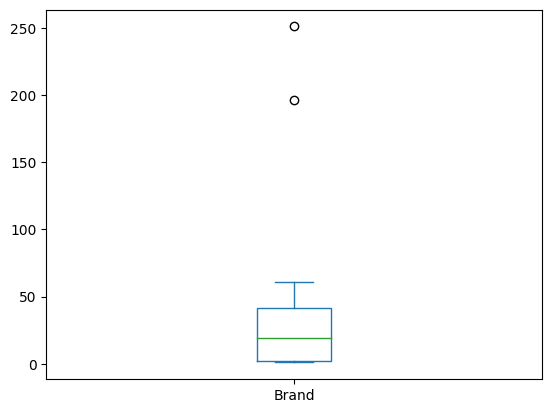

In [44]:
df['Brand'].value_counts().plot(kind='box')

<Axes: >

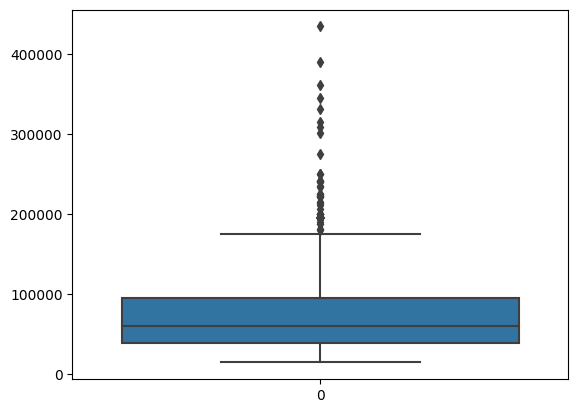

In [47]:
sns.boxplot(df['MRP'])

In [50]:
df['Processor'] = df['Processor'].str.strip()

In [51]:
df['RAM']=df['RAM'].apply(lambda x:x.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM","8 GB DDR4 RAM"))

In [52]:
df.RAM.unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [53]:
df.groupby(['RAM']).agg({'MRP':['min','max','mean']})

MRP                         
                               min       max           mean
RAM                                                        
16 GB DDR4 RAM             44990.0  214790.0  100418.562092
16 GB DDR5 RAM             76590.0  235283.0  179187.116883
16 GB LPDDR3 RAM          233990.0  233990.0  233990.000000
16 GB LPDDR4 RAM           71990.0   71990.0   71990.000000
16 GB LPDDR4X RAM          37990.0  128990.0   72303.062500
16 GB LPDDR5 RAM           89990.0  174990.0  125878.888889
16 GB Unified Memory RAM  181990.0  241990.0  222490.000000
32 GB DDR4 RAM            214990.0  434830.0  305050.000000
32 GB DDR5 RAM            199990.0  389990.0  287080.909091
32 GB LPDDR4X RAM         224990.0  224990.0  224990.000000
32 GB Unified Memory RAM  309490.0  309490.0  309490.000000
4 GB DDR4 RAM              19490.0   61249.0   32376.423077
4 GB LPDDR4 RAM            14990.0   25990.0   20618.571429
4 GB LPDDR4X RAM           20990.0   32990.0   25865.000000
8 GB DDR4 RAM              24990.0  149990.0   47459.708995
8 GB DDR5 RAM              87900.0   96579.0   91842.250000
8 GB LPDDR4X RAM           22990.0   79990.0   42052.500000
8 GB Unified Memory RAM   121990.0  139990.0  136390.000000

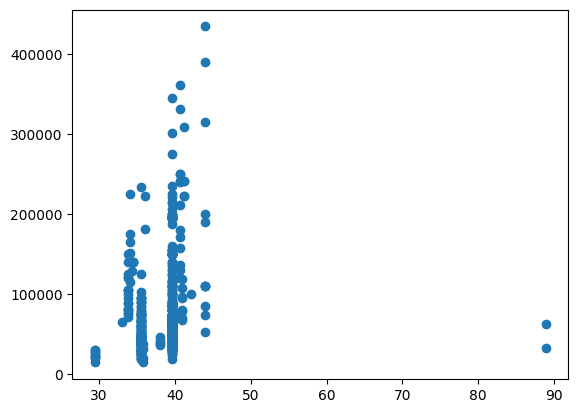

In [54]:
plt.scatter(df['Display'], df['MRP'])

There are Outliers in the Display feature.

In [55]:
df=df[df['Display']<50]

In [56]:
df.shape

(718, 10)

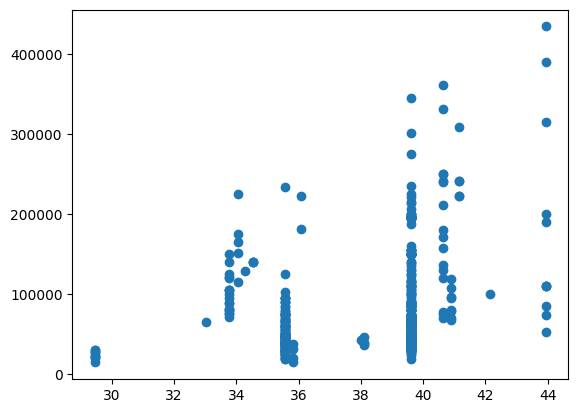

In [57]:
plt.scatter(df['Display'],df['MRP'])

In [58]:
df['OS'].unique()

array(['Windows 11 Operating System', 'Windows 10 Operating System',
       'Mac OS Operating System', 'DOS Operating System',
       'Chrome Operating System',
       'Windows 10 Operating SystemWindows 10 Operating System'],
      dtype=object)

In [59]:
df['OS']=df['OS'].apply(lambda x:x.replace('Windows 10 Operating SystemWindows 10 Operating System','Windows 10 Operating System'))

In [60]:
df['OS'].unique()

array(['Windows 11 Operating System', 'Windows 10 Operating System',
       'Mac OS Operating System', 'DOS Operating System',
       'Chrome Operating System'], dtype=object)

In [61]:
df[['RAMSize','GB','RAMType']] = df['RAM'].str.split(n=2, expand=True)
df=df.drop('GB',axis=1)
df['OS'] = df['OS'].str.split().str[0]
df.head()

,Product,Rating,MRP,Feature,Processor,Display,RAM,OS,Storage,Brand,RAMSize,RAMType
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,35.56,8 GB DDR4 RAM,Windows,256 GB SSD,Lenovo,8,DDR4 RAM
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,Lenovo,8,DDR4 RAM
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,ASUS,8,DDR4 RAM
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,HP,8,DDR4 RAM
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,39.62,8 GB DDR4 RAM,Windows,512 GB SSD,ASUS,8,DDR4 RAM


In [62]:
df['Storage']= df['Storage'].apply(lambda x:x.replace('1 TB HDD512 GB SSD', '1 TB HDD|512 GB SSD').replace('1 TB HDD256 GB SSD',' 1 TB HDD|256 GB SSD'))

In [63]:
df['Storage'].str.strip(' ')

0               256 GB SSD
1               512 GB SSD
2               512 GB SSD
3               512 GB SSD
4               512 GB SSD
              ...         
715                       
716             512 GB SSD
717               1 TB SSD
718             512 GB SSD
719    1 TB HDD|256 GB SSD
Name: Storage, Length: 718, dtype: object

In [64]:
new_df=df[['Brand','Rating','Processor','Display','OS','Storage','RAMSize','RAMType','MRP']]

In [65]:
new_df.head()

,Brand,Rating,Processor,Display,OS,Storage,RAMSize,RAMType,MRP
0,Lenovo,4.2,Intel Core i3 Processor,35.56,Windows,256 GB SSD,8,DDR4 RAM,36990.0
1,Lenovo,4.2,Intel Core i3 Processor,39.62,Windows,512 GB SSD,8,DDR4 RAM,39990.0
2,ASUS,4.3,Intel Core i3 Processor,39.62,Windows,512 GB SSD,8,DDR4 RAM,32990.0
3,HP,4.4,AMD Ryzen 5 Hexa Core Processor,39.62,Windows,512 GB SSD,8,DDR4 RAM,49990.0
4,ASUS,4.4,Intel Core i5 Processor,39.62,Windows,512 GB SSD,8,DDR4 RAM,49990.0


In [66]:
new_df[['Storage_HDD','Storage_SSD']]=new_df['Storage'].str.split('|', expand=True)
val=new_df['Storage_HDD'].str.contains('SSD')
new_df.loc[val, ['Storage_HDD', 'Storage_SSD']]=new_df.loc[val,['Storage_SSD', 'Storage_HDD']].values

In [67]:
new_df['Storage_HDD']=new_df['Storage_HDD'].fillna('0 HDD')

In [68]:
new_df['RAMType']=new_df['RAMType'].apply(lambda x:x.replace('RAM', ''))

In [69]:
new_df.head()

,Brand,Rating,Processor,Display,OS,Storage,RAMSize,RAMType,MRP,Storage_HDD,Storage_SSD
0,Lenovo,4.2,Intel Core i3 Processor,35.56,Windows,256 GB SSD,8,DDR4,36990.0,0 HDD,256 GB SSD
1,Lenovo,4.2,Intel Core i3 Processor,39.62,Windows,512 GB SSD,8,DDR4,39990.0,0 HDD,512 GB SSD
2,ASUS,4.3,Intel Core i3 Processor,39.62,Windows,512 GB SSD,8,DDR4,32990.0,0 HDD,512 GB SSD
3,HP,4.4,AMD Ryzen 5 Hexa Core Processor,39.62,Windows,512 GB SSD,8,DDR4,49990.0,0 HDD,512 GB SSD
4,ASUS,4.4,Intel Core i5 Processor,39.62,Windows,512 GB SSD,8,DDR4,49990.0,0 HDD,512 GB SSD


In [70]:
newdf=new_df[['Brand','Rating','Processor','Display','OS','RAMSize','RAMType','Storage_HDD','Storage_SSD','MRP']]

In [71]:
newdf.head(20)

,Brand,Rating,Processor,Display,OS,RAMSize,RAMType,Storage_HDD,Storage_SSD,MRP
0,Lenovo,4.2,Intel Core i3 Processor,35.56,Windows,8,DDR4,0 HDD,256 GB SSD,36990.0
1,Lenovo,4.2,Intel Core i3 Processor,39.62,Windows,8,DDR4,0 HDD,512 GB SSD,39990.0
2,ASUS,4.3,Intel Core i3 Processor,39.62,Windows,8,DDR4,0 HDD,512 GB SSD,32990.0
3,HP,4.4,AMD Ryzen 5 Hexa Core Processor,39.62,Windows,8,DDR4,0 HDD,512 GB SSD,49990.0
4,ASUS,4.4,Intel Core i5 Processor,39.62,Windows,8,DDR4,0 HDD,512 GB SSD,49990.0
5,HP,4.2,Intel Core i3 Processor,35.56,Windows,8,DDR4,0 HDD,256 GB SSD,36990.0
6,DELL,4.3,Intel OptaneIntel Core i3 Processor,39.62,Windows,8,DDR4,1 TB HDD,256 GB SSD,38990.0
7,RedmiBook,4.1,Intel Core i5 Processor,39.62,Windows,8,DDR4,0 HDD,512 GB SSD,39990.0
8,realme,4.4,Intel Core i3 Processor,35.56,Windows,8,DDR4,0 HDD,256 GB SSD,46990.0
9,ASUS,4.1,AMD Ryzen 7 Quad Core Processor,35.56,Windows,16,DDR4,0 HDD,512 GB SSD,44990.0


In [72]:
newdf['Storage_HDD']=newdf['Storage_HDD'].apply(lambda x:x.replace('GB', ''))

In [73]:
newdf.isnull().sum()

Brand           0
Rating          0
Processor       0
Display         0
OS              0
RAMSize         0
RAMType         0
Storage_HDD     0
Storage_SSD    26
MRP             0
dtype: int64

In [74]:
newdf.dropna(inplace=True)

In [75]:
newdf['Storage_SSD']=newdf['Storage_SSD'].apply(lambda x: x.replace('SSD', ''))

In [76]:
newdf['Storage_SSD']=newdf['Storage_SSD'].apply(lambda x: x.replace('1 TB', '1000').replace('2 TB','2000'))

In [77]:
newdf['Storage_SSD']=newdf['Storage_SSD'].apply(lambda x: x.replace('GB', ''))

In [78]:
newdf.head(20)

,Brand,Rating,Processor,Display,OS,RAMSize,RAMType,Storage_HDD,Storage_SSD,MRP
0,Lenovo,4.2,Intel Core i3 Processor,35.56,Windows,8,DDR4,0 HDD,256,36990.0
1,Lenovo,4.2,Intel Core i3 Processor,39.62,Windows,8,DDR4,0 HDD,512,39990.0
2,ASUS,4.3,Intel Core i3 Processor,39.62,Windows,8,DDR4,0 HDD,512,32990.0
3,HP,4.4,AMD Ryzen 5 Hexa Core Processor,39.62,Windows,8,DDR4,0 HDD,512,49990.0
4,ASUS,4.4,Intel Core i5 Processor,39.62,Windows,8,DDR4,0 HDD,512,49990.0
5,HP,4.2,Intel Core i3 Processor,35.56,Windows,8,DDR4,0 HDD,256,36990.0
6,DELL,4.3,Intel OptaneIntel Core i3 Processor,39.62,Windows,8,DDR4,1 TB HDD,256,38990.0
7,RedmiBook,4.1,Intel Core i5 Processor,39.62,Windows,8,DDR4,0 HDD,512,39990.0
8,realme,4.4,Intel Core i3 Processor,35.56,Windows,8,DDR4,0 HDD,256,46990.0
9,ASUS,4.1,AMD Ryzen 7 Quad Core Processor,35.56,Windows,16,DDR4,0 HDD,512,44990.0


In [79]:
newdf['Storage_HDD']=newdf['Storage_HDD'].apply(lambda x: x.replace('1 TB', '1000').replace('HDD',''))

In [80]:
newdf.head(20)

,Brand,Rating,Processor,Display,OS,RAMSize,RAMType,Storage_HDD,Storage_SSD,MRP
0,Lenovo,4.2,Intel Core i3 Processor,35.56,Windows,8,DDR4,0,256,36990.0
1,Lenovo,4.2,Intel Core i3 Processor,39.62,Windows,8,DDR4,0,512,39990.0
2,ASUS,4.3,Intel Core i3 Processor,39.62,Windows,8,DDR4,0,512,32990.0
3,HP,4.4,AMD Ryzen 5 Hexa Core Processor,39.62,Windows,8,DDR4,0,512,49990.0
4,ASUS,4.4,Intel Core i5 Processor,39.62,Windows,8,DDR4,0,512,49990.0
5,HP,4.2,Intel Core i3 Processor,35.56,Windows,8,DDR4,0,256,36990.0
6,DELL,4.3,Intel OptaneIntel Core i3 Processor,39.62,Windows,8,DDR4,1000,256,38990.0
7,RedmiBook,4.1,Intel Core i5 Processor,39.62,Windows,8,DDR4,0,512,39990.0
8,realme,4.4,Intel Core i3 Processor,35.56,Windows,8,DDR4,0,256,46990.0
9,ASUS,4.1,AMD Ryzen 7 Quad Core Processor,35.56,Windows,16,DDR4,0,512,44990.0


In [81]:
newdf['Storage_SSD']=newdf['Storage_SSD'].str.strip()
newdf['Storage_HDD']=newdf['Storage_HDD'].str.strip()

In [82]:
newdf['RAMSize'].unique()

array(['8', '16', '4', '32'], dtype=object)

In [83]:
newdf['Storage_SSD'].value_counts()

512                 376
1000                176
256                 124
2000                  7
128                   6
128  1000 HDD128      2
256  HDD256           1
Name: Storage_SSD, dtype: int64

In [84]:
newdf['Storage_SSD']=newdf['Storage_SSD'].apply(lambda x:x.replace('128  1000 HDD128','').replace('256  HDD256',''))

In [85]:
newdf=newdf[newdf['Storage_SSD']!='']

In [86]:
newdf.head(20)

,Brand,Rating,Processor,Display,OS,RAMSize,RAMType,Storage_HDD,Storage_SSD,MRP
0,Lenovo,4.2,Intel Core i3 Processor,35.56,Windows,8,DDR4,0,256,36990.0
1,Lenovo,4.2,Intel Core i3 Processor,39.62,Windows,8,DDR4,0,512,39990.0
2,ASUS,4.3,Intel Core i3 Processor,39.62,Windows,8,DDR4,0,512,32990.0
3,HP,4.4,AMD Ryzen 5 Hexa Core Processor,39.62,Windows,8,DDR4,0,512,49990.0
4,ASUS,4.4,Intel Core i5 Processor,39.62,Windows,8,DDR4,0,512,49990.0
5,HP,4.2,Intel Core i3 Processor,35.56,Windows,8,DDR4,0,256,36990.0
6,DELL,4.3,Intel OptaneIntel Core i3 Processor,39.62,Windows,8,DDR4,1000,256,38990.0
7,RedmiBook,4.1,Intel Core i5 Processor,39.62,Windows,8,DDR4,0,512,39990.0
8,realme,4.4,Intel Core i3 Processor,35.56,Windows,8,DDR4,0,256,46990.0
9,ASUS,4.1,AMD Ryzen 7 Quad Core Processor,35.56,Windows,16,DDR4,0,512,44990.0


In [89]:
dff=newdf.copy()
dff.to_csv("laptop-types.csv",index=False)

In [90]:
newdf[['RAMSize','Storage_HDD','Storage_SSD']]=newdf[['RAMSize','Storage_HDD','Storage_SSD']].astype(int)

In [91]:
from sklearn.preprocessing import LabelEncoder
le_pr=LabelEncoder()
newdf['Processor']=le_pr.fit_transform(newdf['Processor'])
le_os = LabelEncoder()
newdf['OS']=le_os.fit_transform(newdf['OS'])
le_brand=LabelEncoder()
newdf['Brand']=le_brand.fit_transform(newdf['Brand'])
le_ramtype=LabelEncoder()
newdf['RAMType']=le_ramtype.fit_transform(newdf['RAMType'])

In [92]:
newdf.head()

,Brand,Rating,Processor,Display,OS,RAMSize,RAMType,Storage_HDD,Storage_SSD,MRP
0,7,4.2,16,35.56,2,8,0,0,256,36990.0
1,7,4.2,16,39.62,2,8,0,0,512,39990.0
2,2,4.3,16,39.62,2,8,0,0,512,32990.0
3,5,4.4,5,39.62,2,8,0,0,512,49990.0
4,2,4.4,17,39.62,2,8,0,0,512,49990.0


<Axes: >

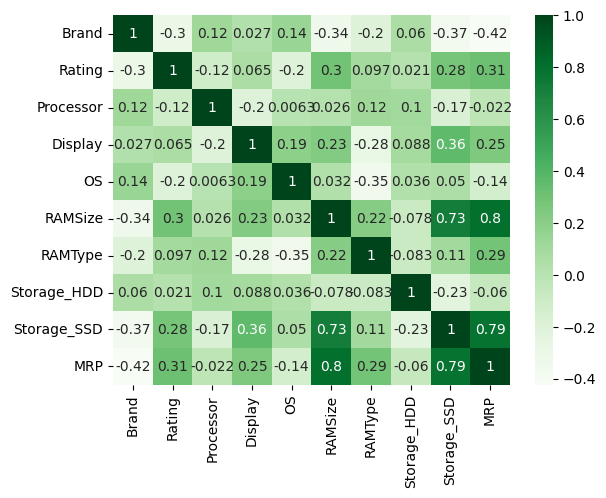

In [93]:
sns.heatmap(newdf.corr(),annot=True,cmap='Greens')

In [94]:
newdf.corr()[['MRP']]

,MRP
Brand,-0.423702
Rating,0.311393
Processor,-0.021758
Display,0.247480
OS,-0.139020
RAMSize,0.803470
RAMType,0.290954
Storage_HDD,-0.059693
Storage_SSD,0.786622
MRP,1.000000


From these We can say that Ramsize,Storage_SSD,Rating,RamType,Display are  more correlated with MRP(or)Price.

# Model Building

In [95]:
x=newdf.drop(['MRP','Rating'],axis=1)
y=newdf.MRP

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:16<00:00,  2.51it/s]


In [98]:
print(models)

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
XGBRegressor                                 0.92       0.92  15503.86   
ExtraTreesRegressor                          0.92       0.92  15531.26   
BaggingRegressor                             0.92       0.92  15718.92   
RandomForestRegressor                        0.90       0.91  17126.16   
GradientBoostingRegressor                    0.90       0.91  17289.35   
DecisionTreeRegressor                        0.87       0.88  19752.81   
KNeighborsRegressor                          0.85       0.86  21411.12   
ExtraTreeRegressor                           0.84       0.85  22059.22   
PoissonRegressor                             0.70       0.72  29897.90   
HistGradientBoostingRegressor                0.70       0.72  30065.11   
AdaBoostRegressor                            0.70       0.71  30160.19   
LGBMRegressor                         

In [99]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor(n_estimators=100, random_state=0)
model.fit(x_train,y_train)

ExtraTreesRegressor(random_state=0)

In [100]:
pred=model.predict(x_test)

In [101]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9244491325893055

Model is 92% accurate.

In [122]:
newdf.to_csv("Laptop_details.csv",index=False)

In [102]:
import pickle
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(model, file)

In [103]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(le_pr, f)

In [104]:
with open('encoder2.pkl', 'wb') as f:
    pickle.dump(le_os, f)

In [105]:
with open('encoder3.pkl', 'wb') as f:
    pickle.dump(le_brand, f)

In [128]:
with open('encoder.pkl4', 'wb') as f:
    pickle.dump(le_ramtype, f)